# Glass Identification data set

## 1. Exploratory Data Analysis

#### 1.1. Data set description

Glass Identification data set was generated to help in criminological investigation. 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")
import warnings
warnings.simplefilter("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline

In [3]:
# load dataset
df=pd.DataFrame.from_csv("glass.data.txt", sep=",",header=None,index_col=None)
# drop first column
df=df[df.columns[1:11]]
# Add columns name
df.columns=["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Class"]
df.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI       214 non-null float64
Na       214 non-null float64
Mg       214 non-null float64
Al       214 non-null float64
Si       214 non-null float64
K        214 non-null float64
Ca       214 non-null float64
Ba       214 non-null float64
Fe       214 non-null float64
Class    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


Data set contains 214 instances, 9 numeric attributes and class name.

There are no missing data.

Features:
    1. RI: refractive index
    2. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 3-9)
    3. Mg: Magnesium
    4. Al: Aluminum
    5. Si: Silicon
    6. K: Potassium
    7. Ca: Calcium
    8. Ba: Barium
    9. Fe: Iron

Glass types:
    1. building_windows_float_processed
    2. building_windows_non_float_processed
    3. vehicle_windows_float_processed
    4. vehicle_windows_non_float_processed (none in this database)
    5. containers
    6. tableware
    7. headlamps

#### 1.2. Summary statistics and data distribution

The mean of some features are very small, such as "Fe", "Ba" or very large, "Si". On the plot 1.1 we see "Si" feature has larger weight in the oxide. Naturally this is dominant component of glass.
We will need to standardise the features so they all have mean of 0 and standard deviation of 1.

Standardization of datasets is a common requirement for many machine learning algorithms as many elements used in the objective function assume that all features are centered around zero and have variance in the same order.  If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected. 

We can explore further the distribution of each feature by class.

In [5]:
print(df.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe       Class  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

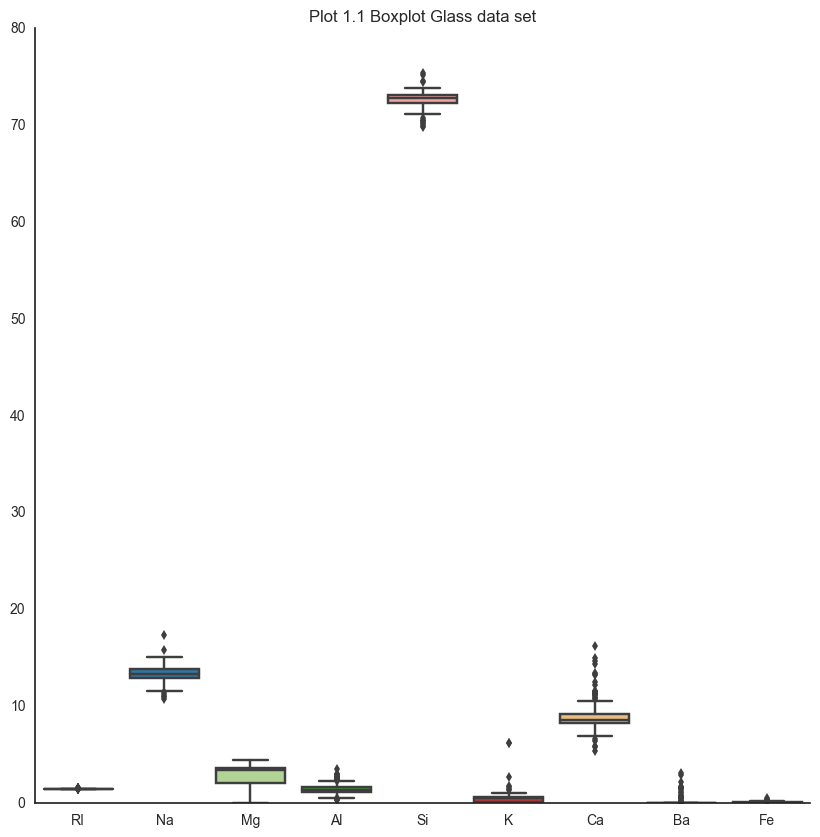

In [6]:
fig,ax=plt.subplots(figsize=(10, 10))
sns.boxplot(data=df.loc[:,"RI":"Fe"], palette='Paired',ax=ax)
sns.despine()
plt.title('Plot 1.1 Boxplot Glass data set')

Let's see in the details each feature on plot 1.2 and 1.3.

None of the features are normally distrubuted. There are high degree of skewness of features, such as "K", "Ca", "Ba" and "Fe".

Some features are class bound. "Fe" element contains predominately in building windows and vehicle glass types, while "Ba" in large amounts contains in headlamps glass. 
Metal oxides are added to silica melts to contribute different properties to the resulting glass. This explains the dominance of the metal elements in different types of glass.

There are many outliers in dataset.

There is a strong positive linear relationship between "Ca" and "RI" with 0.81 correlation coefficient (plot 1.4). 


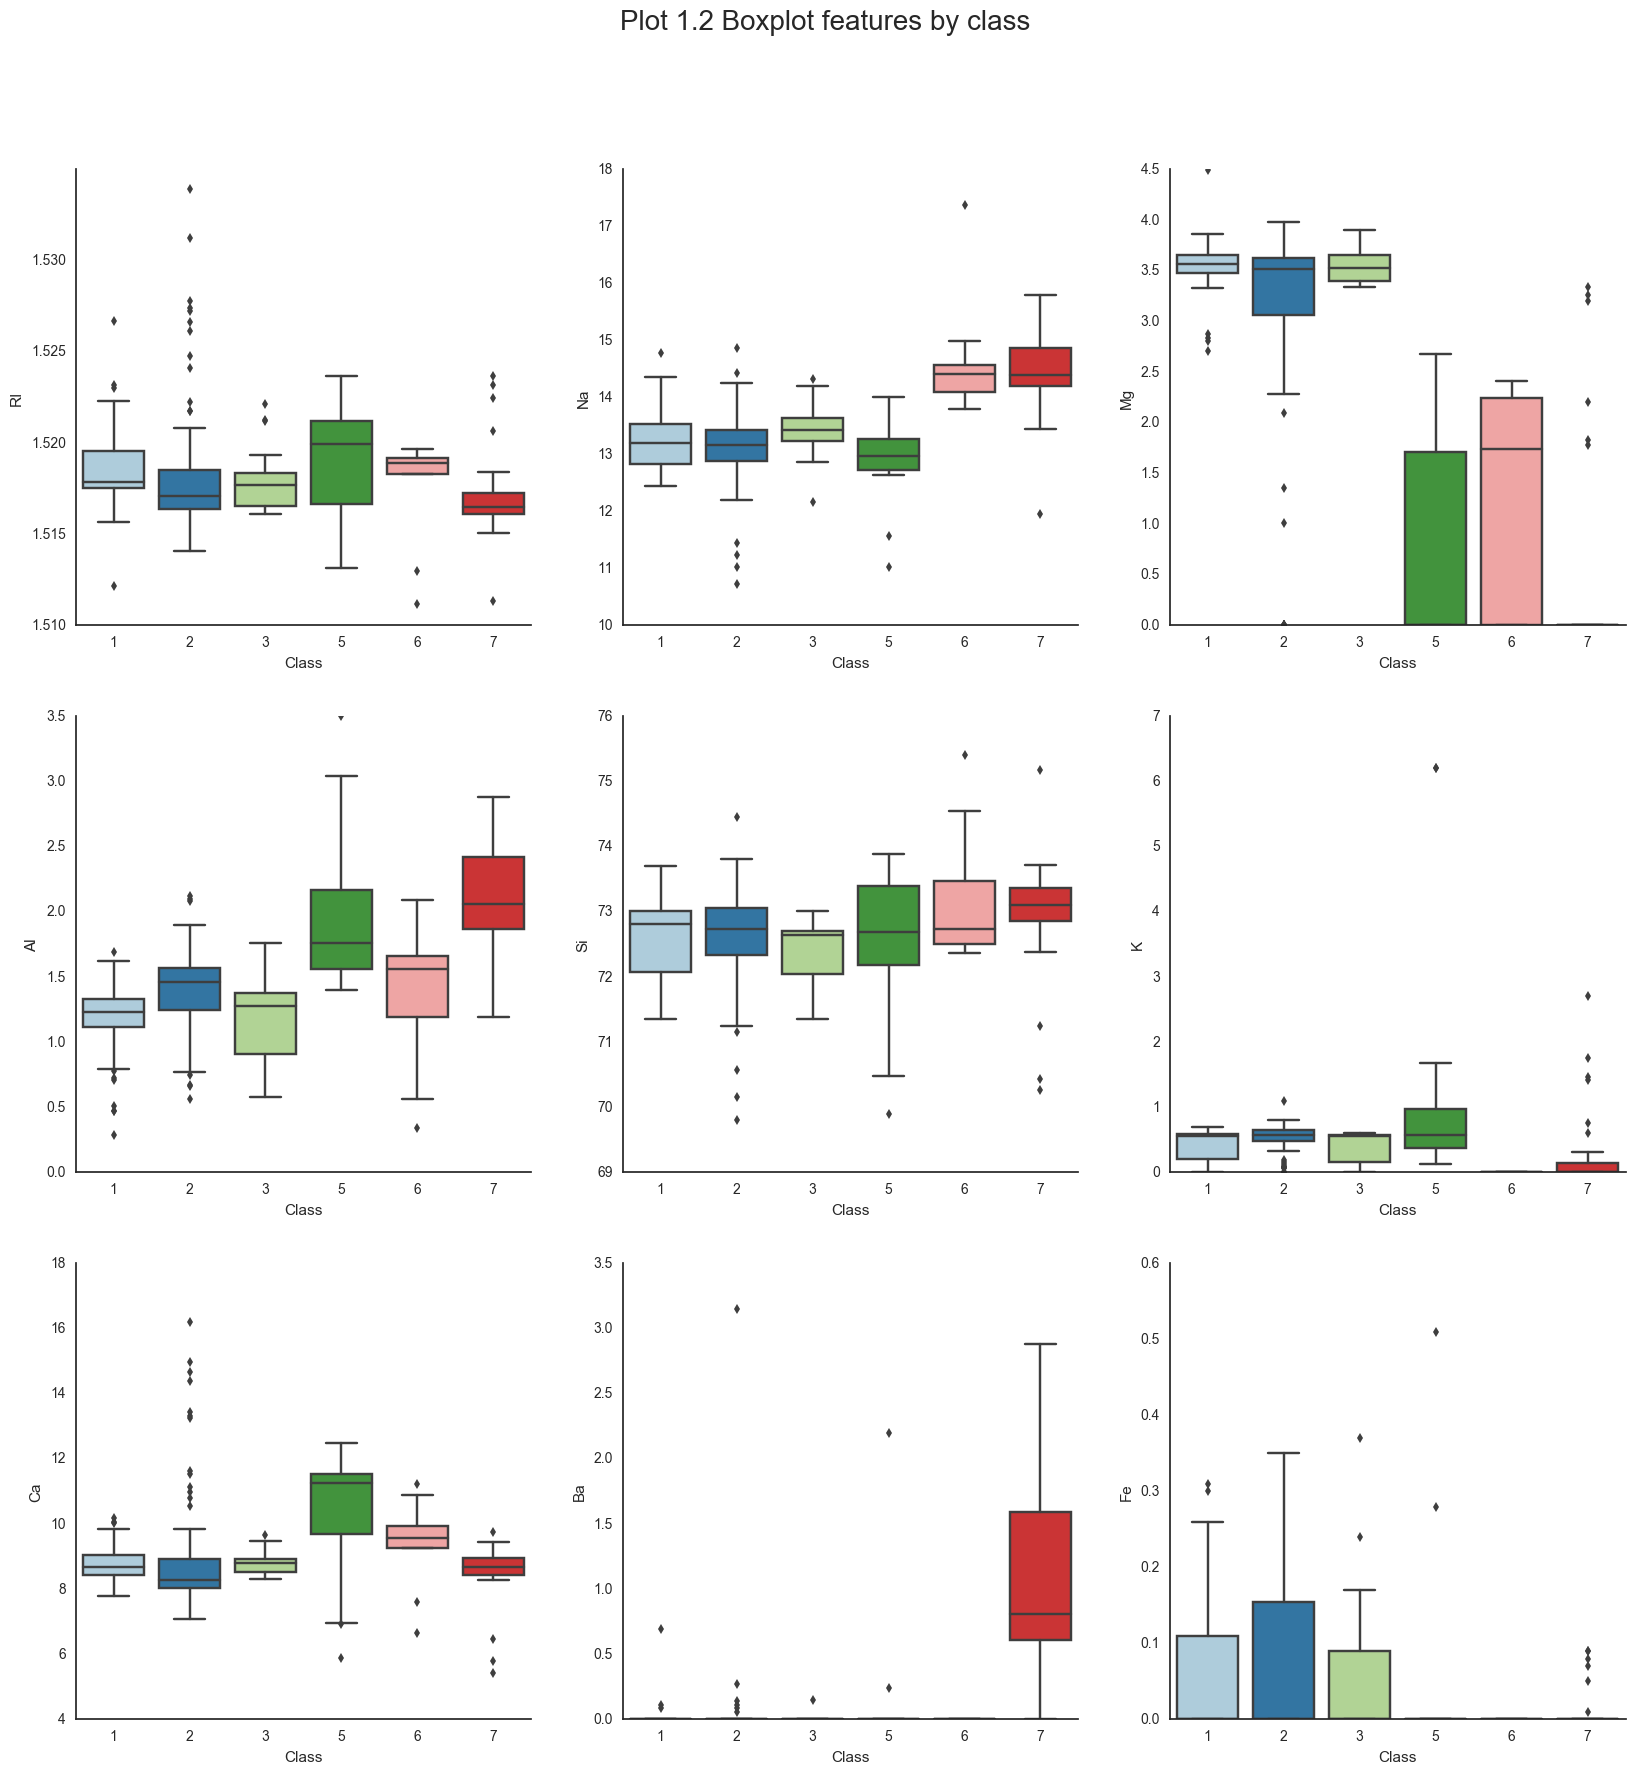

In [7]:
fig, axs = plt.subplots(ncols=3,nrows=3,figsize=(20, 20))
sns.boxplot(x='Class', y='RI', data=df, palette='Paired', ax=axs[0][0])
sns.boxplot(x='Class', y='Na', data=df, palette='Paired', ax=axs[0][1])
sns.boxplot(x='Class', y='Mg', data=df, palette='Paired', ax=axs[0][2])

sns.boxplot(x='Class', y='Al', data=df, palette='Paired', ax=axs[1][0])
sns.boxplot(x='Class', y='Si', data=df, palette='Paired', ax=axs[1][1])
sns.boxplot(x='Class', y='K', data=df, palette='Paired', ax=axs[1][2])

sns.boxplot(x='Class', y='Ca', data=df, palette='Paired', ax=axs[2][0])
sns.boxplot(x='Class', y='Ba', data=df, palette='Paired', ax=axs[2][1])
sns.boxplot(x='Class', y='Fe', data=df, palette='Paired', ax=axs[2][2])

sns.despine()
fig.suptitle('Plot 1.2 Boxplot features by class',fontsize=20)

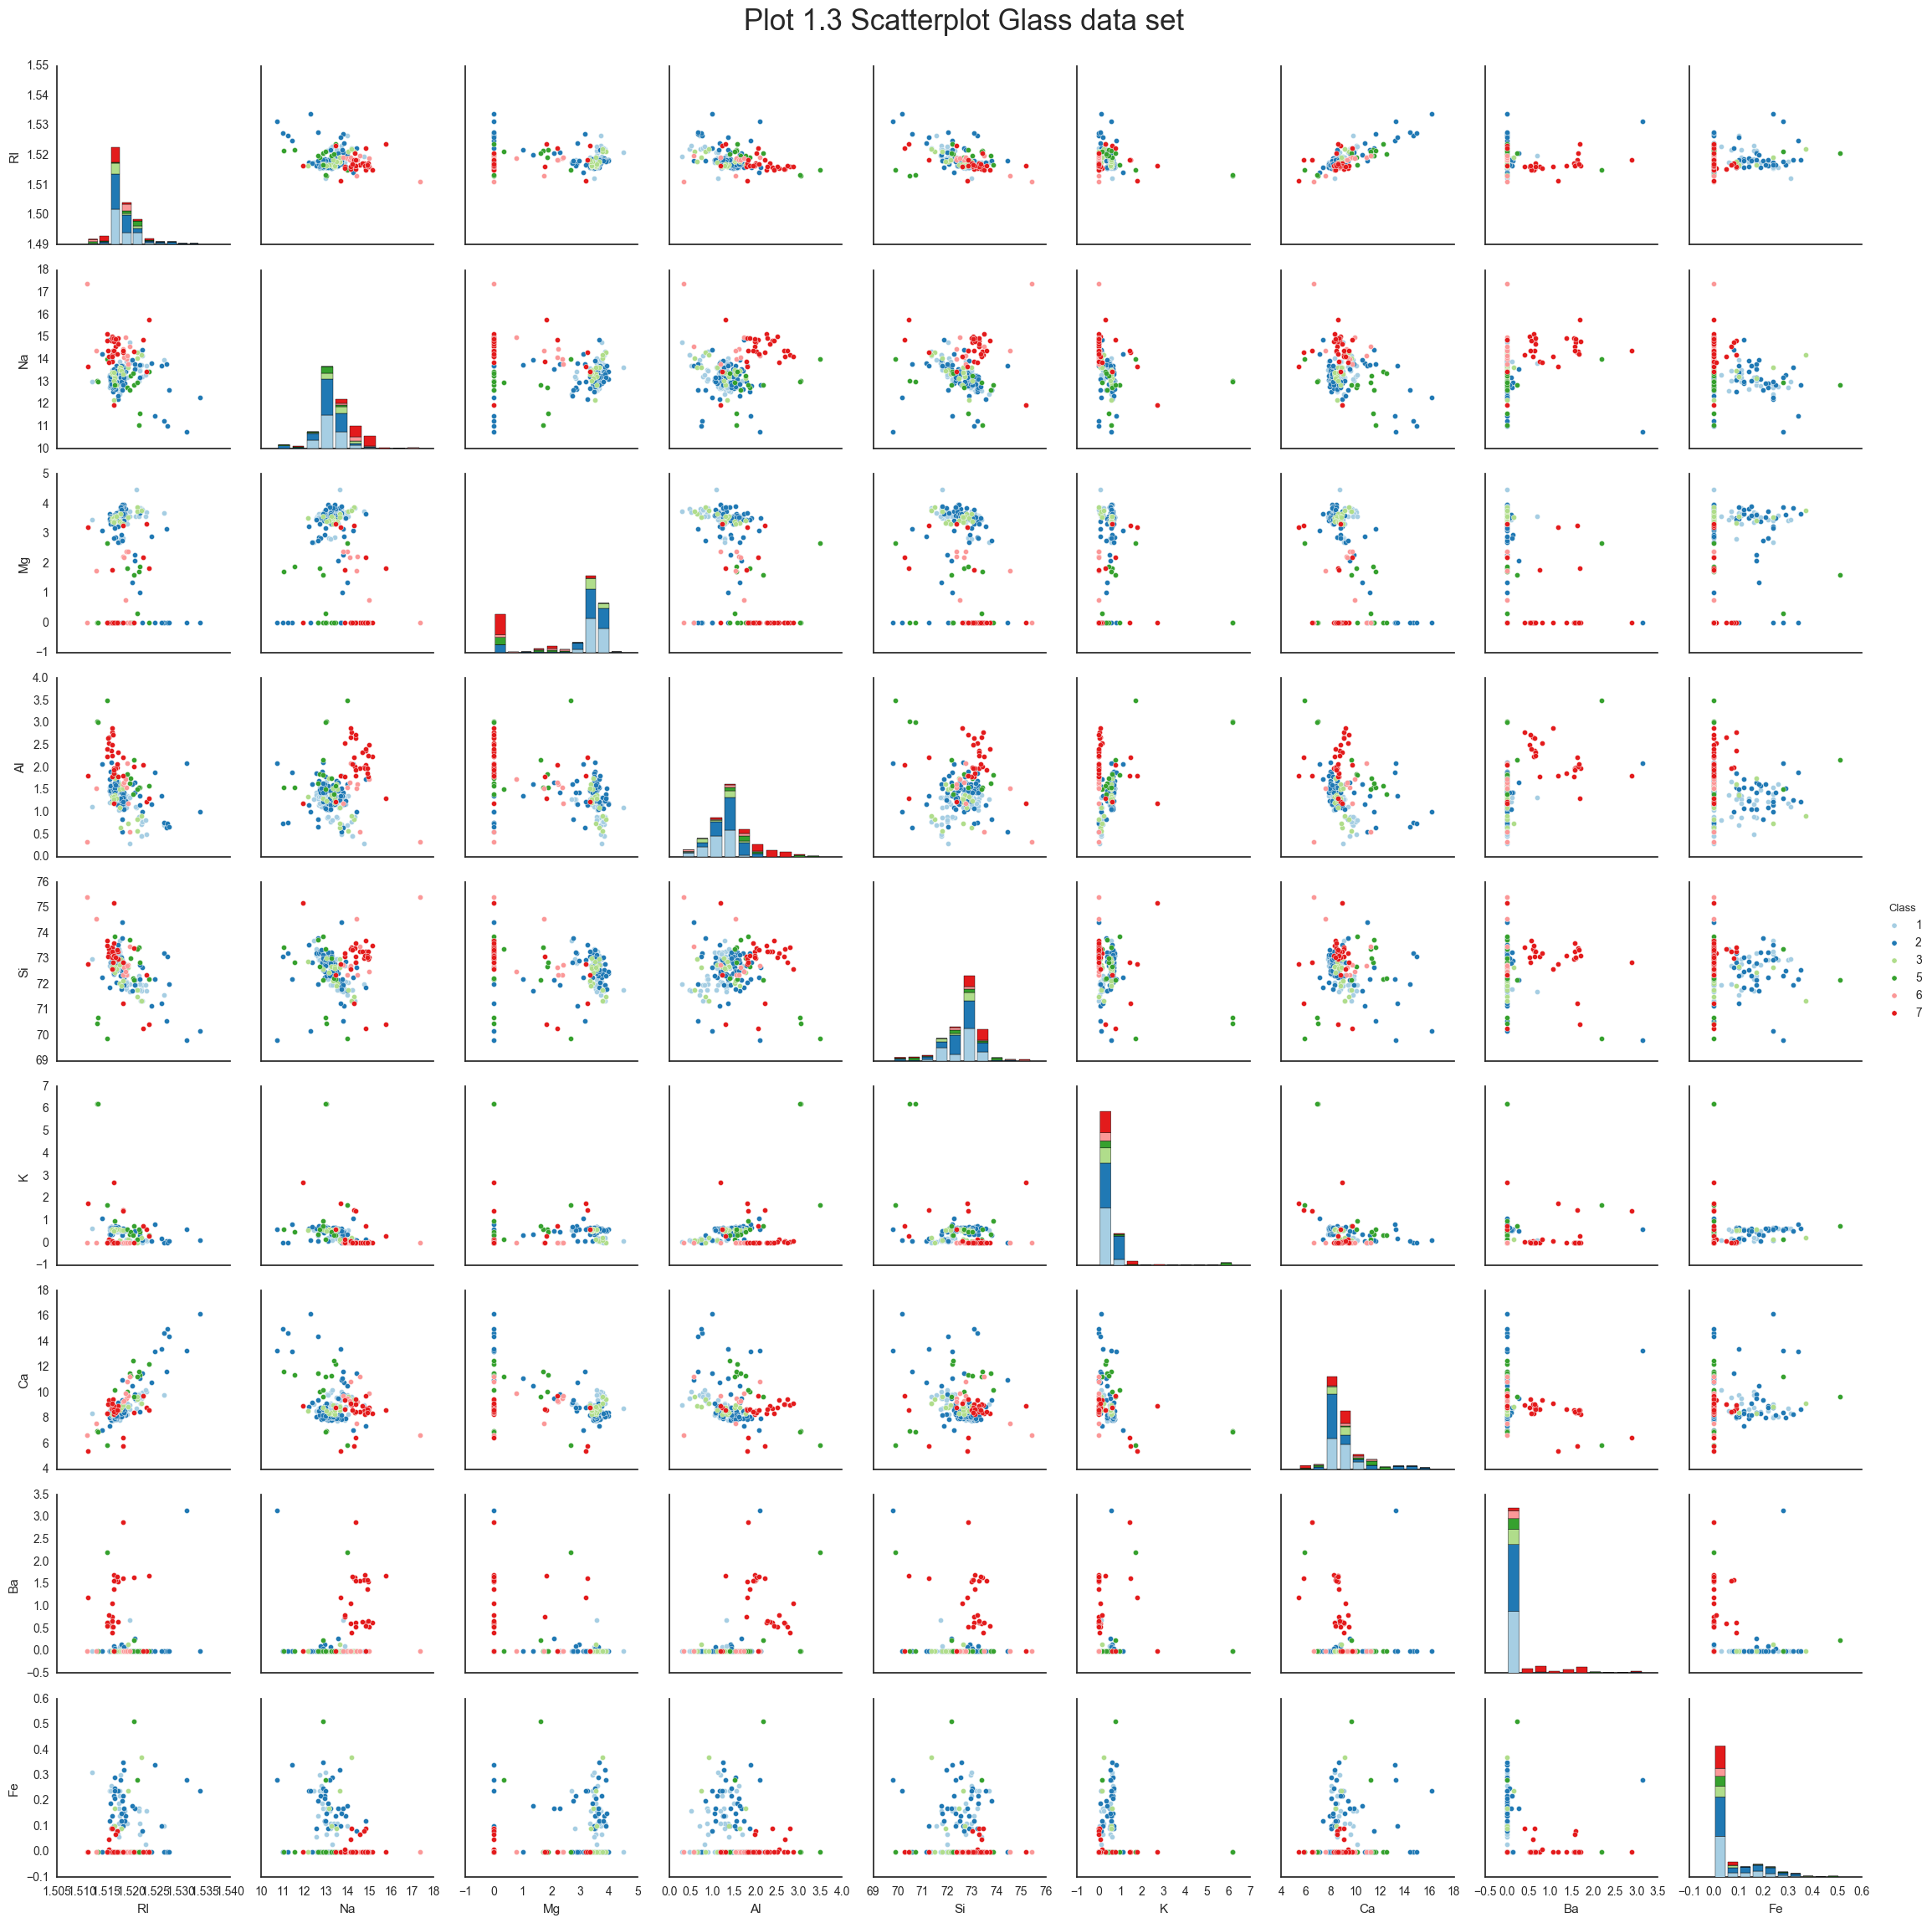

In [8]:
# distribution of features 
plt.figure(figsize=[50, 50])
sns.pairplot(df, vars=df.columns[:-1], hue='Class', palette='Paired')
plt.suptitle('Plot 1.3 Scatterplot Glass data set',y=1.02, horizontalalignment='center',fontsize=25)

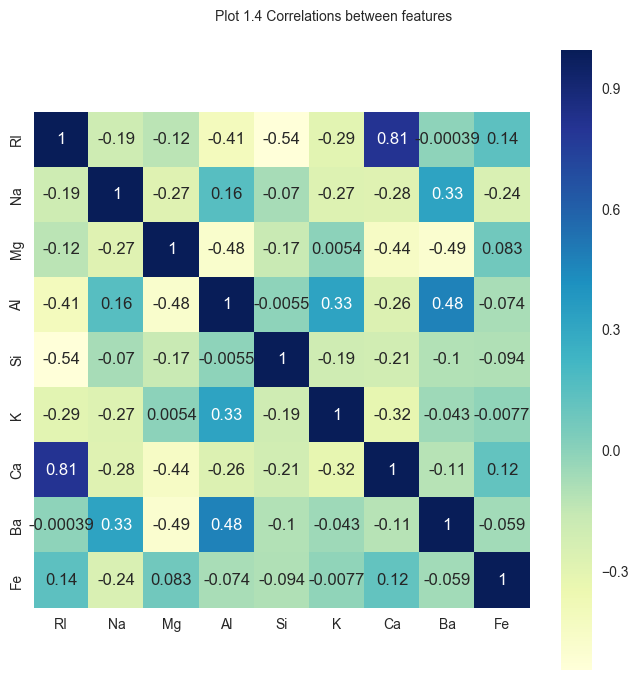

In [9]:
# correlation between features
plt.figure(figsize=[8, 8])
sns.heatmap(df.corr().loc["RI":"Fe","RI":"Fe"], square=True, annot=True, cmap='YlGnBu')
plt.suptitle('Plot 1.4 Correlations between features', fontsize=10, y=.95, horizontalalignment='center')

Let's see the distribution of glass types.

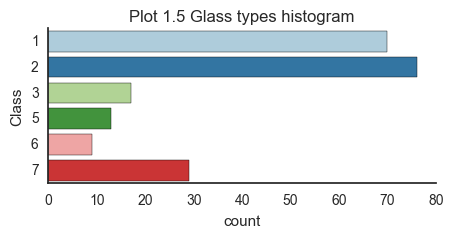

In [10]:
# glass type histogram
f, ax = plt.subplots(figsize=(5, 2))
sns.countplot(y="Class", data=df,palette='Paired')
sns.despine()
plt.title('Plot 1.5 Glass types histogram')

In [11]:
df['Class'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Class, dtype: int64

The data set is highly imbalanced. The two glass types (building windows) contributes 68% of observations.

Machine Learning algorithms tend to produce unsatisfactory classifiers when faced with imbalanced datasets. 
Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards majority class data. The features of the minority class are treated as noise and are often ignored.

When dealing with imbalanced class distributon problem we need to chose strategy either improving data by resampling techniques or using ensamble classification algorithms.

## 2. Model selection

Glass data set is multiclass classification problem with imbalanced class dataset.

#### 2.1. Training and test data set

In [12]:
# Separating out the features and target
X = df.values[:,:9]
y = df.values[:,9]

Let's randomly divide the dataset into a training and a test data where the training dataset will contain 70% of the samples and the test dataset will contain 30%, respectively.

#### 2.2. Features standardization

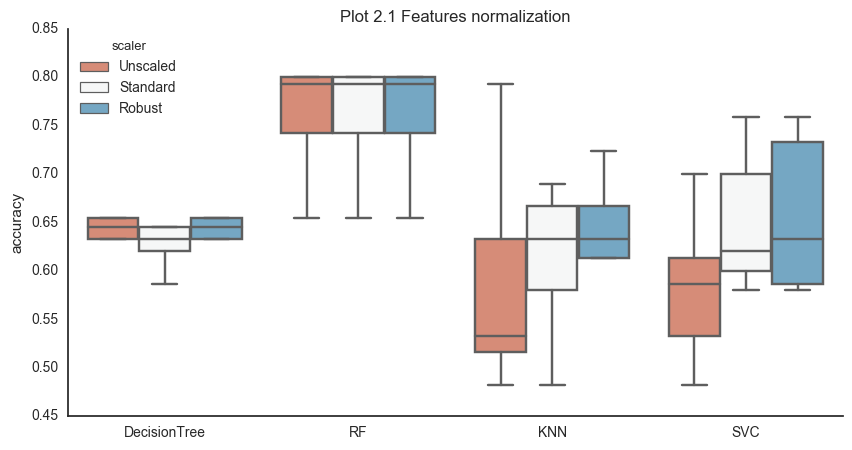

In [13]:
# Estimate classifiers performance on the normalised and not normalised data.
seed=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)

n_estimators = 200
scalers=[
    ('Unscaled',None),
    ('Standard',StandardScaler()),
    ('Robust',RobustScaler(quantile_range=(25, 75)))
]

kfold = StratifiedKFold(n_splits=5, random_state=seed)
         
models = [
    ('DecisionTree',DecisionTreeClassifier(random_state=seed)),
    ('RF', RandomForestClassifier(random_state=seed, n_estimators=n_estimators)),
    ('KNN',KNeighborsClassifier(n_neighbors=6)),
    ('SVC', SVC(kernel='rbf',random_state=seed))
]

names,scores=[],[]
for scaler in scalers:
    for model in models:
        pipe=Pipeline([scaler,model])
        cv_results = cross_val_score(pipe, X_train, y_train, scoring='accuracy',cv=kfold,n_jobs=1)
        scores.append(cv_results)
        names.append([scaler[0],model[0]])
        
scores_df=pd.DataFrame(scores)
names_df=pd.DataFrame(names,columns=['scaler','class'])
cl_df=pd.concat([names_df,scores_df],axis=1)
df_melt=pd.melt(cl_df,id_vars=['scaler','class'],value_vars=list(scores_df.columns))

f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x="class", y="value", hue="scaler",data=df_melt,palette='RdBu',showfliers=False)
ax.set_title("Plot 2.1 Features normalization")
ax.set(xlabel='', ylabel='accuracy')
sns.despine()

Normalisation of the data improves the performance of the KNN and SVC but doesn't affect DT or RF. 
Robust scaler seems to be a better choice for normalisation.

Let's visualise the effect of normalisation on the distribution using PCA.

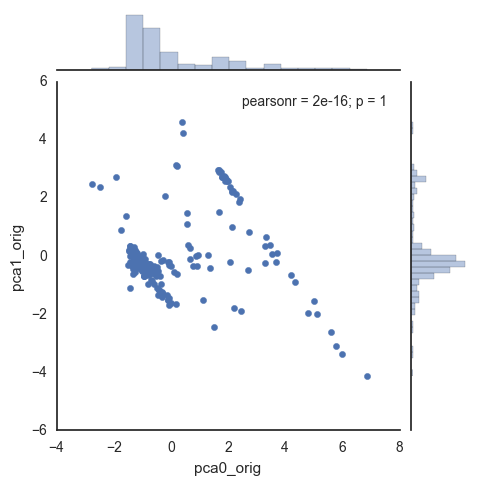

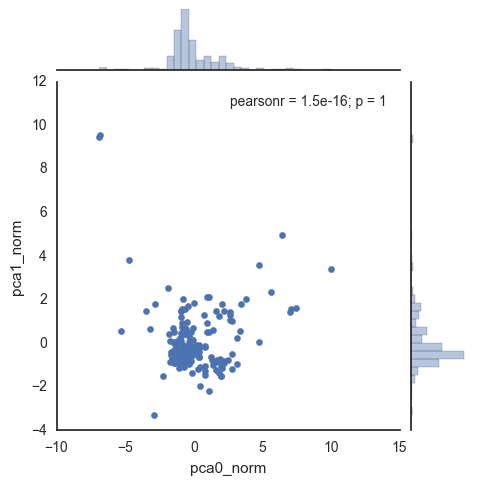

In [14]:
# Instanciate a Scaler object
r_scaler=RobustScaler(quantile_range=(25, 75))

# Apply fit_transform on original dataset
X_scaled = r_scaler.fit_transform(X)

# Instanciate a PCA object
pca_original = PCA(n_components=2)
pca_norm = PCA(n_components=2)

# Apply the PCA on original and normalised data
pca_comp_orig = pca_original.fit_transform(X)
pca_comp_norm = pca_norm.fit_transform(X_scaled)

principal_df_orig = pd.DataFrame(data = pca_comp_orig,columns=['pca0_orig','pca1_orig'])
principal_df_norm = pd.DataFrame(data = pca_comp_norm,columns=['pca0_norm','pca1_norm'])
                                          
sns.jointplot(principal_df_orig['pca0_orig'], principal_df_orig['pca1_orig'],size=5,kind='scatter',ratio=5)
sns.jointplot(principal_df_norm['pca0_norm'], principal_df_norm['pca1_norm'],size=5,kind='scatter',ratio=5)

After normalisation the data is more centered, the data distribution has improved towards normal shape.
We also can see there are less outliers as well.

#### 2.3. Dimetionality reduction with PCA

Let's estimate the effect of the dimentionality reduction.

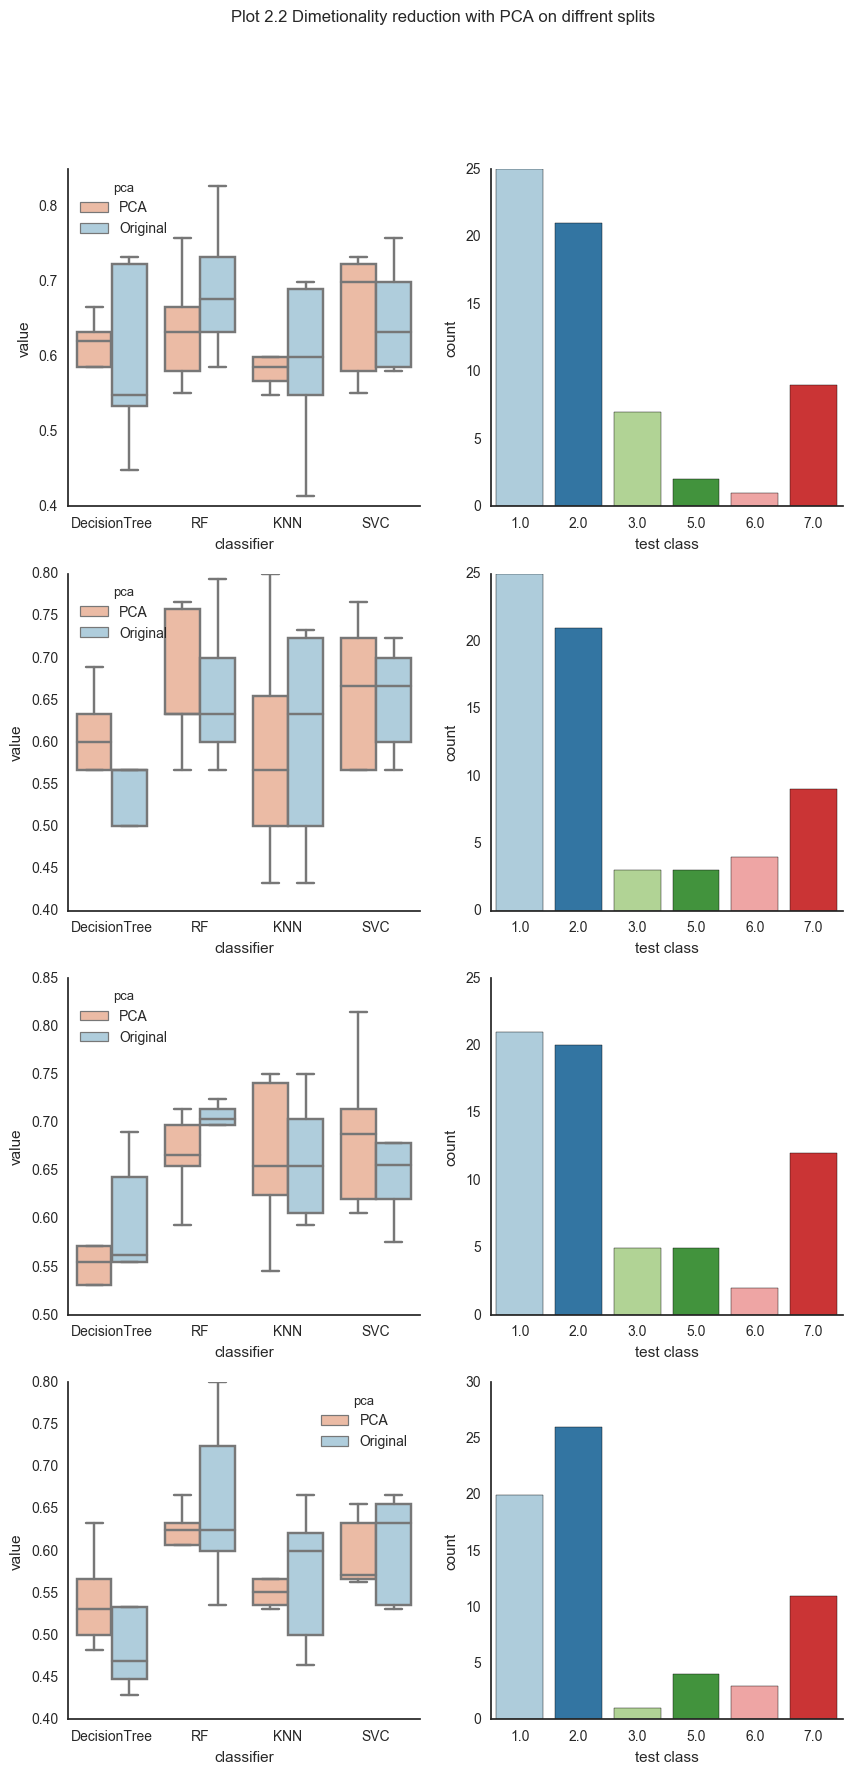

In [15]:
# Estimate classifiers performance on the normalised data for each new distribution with and without PCA 
distribution_seed=[1,2,3,4]
n_estimators = 200

names,scores,pca_result=[],[],[]
class_df=[]

for seed in distribution_seed:
    scaler=('Robust',RobustScaler(quantile_range=(25, 75)))
    kfold = StratifiedKFold(n_splits=5, random_state=seed)
    pca=[
        ('PCA',PCA(0.90)),
        ('Original',PCA(.99)),
        ]

    models = [
        ('DecisionTree',DecisionTreeClassifier(random_state=seed)),
        ('RF', RandomForestClassifier(random_state=seed, n_estimators=n_estimators)),
        ('KNN',KNeighborsClassifier(n_neighbors=6)),
        ('SVC', SVC(kernel='rbf',random_state=seed))
    ]
    # Create a new split from original data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)
    
    class_df.append([seed,y_test])
    
    for pca_model in pca:
        for model in models:
            pipe=Pipeline([scaler,pca_model,model])
            cv_results = cross_val_score(pipe, X_train, y_train, scoring='accuracy',cv=kfold,n_jobs=1)
            scores.append(cv_results)
            names.append([seed,pca_model[0],model[0]])

    pca[1][1].fit_transform(scaler[1].fit_transform(X_train))
    pca_result.append(pca[1][1].explained_variance_ratio_)
    
    
scores_df=pd.DataFrame(scores)
names_df=pd.DataFrame(names,columns=['distr','pca','classifier'])
cl_df=pd.concat([names_df,scores_df],axis=1)
df_melt=pd.melt(cl_df,id_vars=['distr','pca','classifier'],value_vars=list(scores_df.columns))

f, axs = plt.subplots(ncols=2,nrows=4,figsize=(10, 20))
sns.boxplot(x="classifier", y="value",hue='pca',data=df_melt[df_melt['distr']==1],palette='RdBu',showfliers=False, ax=axs[0][0])
sns.countplot(x="test class", data=pd.DataFrame(class_df[0][1],columns=['test class']),palette='Paired', ax=axs[0][1])

sns.boxplot(x="classifier", y="value",hue='pca',data=df_melt[df_melt['distr']==2],palette='RdBu',showfliers=False, ax=axs[1][0])
sns.countplot(x="test class", data=pd.DataFrame(class_df[1][1],columns=['test class']),palette='Paired', ax=axs[1][1])

sns.boxplot(x="classifier", y="value",hue='pca',data=df_melt[df_melt['distr']==3],palette='RdBu',showfliers=False, ax=axs[2][0])
sns.countplot(x="test class", data=pd.DataFrame(class_df[2][1],columns=['test class']),palette='Paired', ax=axs[2][1])

sns.boxplot(x="classifier", y="value",hue='pca',data=df_melt[df_melt['distr']==4],palette='RdBu',showfliers=False, ax=axs[3][0])
sns.countplot(x="test class", data=pd.DataFrame(class_df[3][1],columns=['test class']),palette='Paired', ax=axs[3][1])

f.suptitle("Plot 2.2 Dimetionality reduction with PCA on diffrent splits")
sns.despine()

In [16]:
# Dimentionality rediction for each split
print('Principal components/ Variance explained:\n')
for i in pca_result:
    print(len(list(i)),', %0.3f'%(list(i)[0]+list(i)[1]))

Principal components/ Variance explained:

7 , 0.547
7 , 0.614
7 , 0.595
7 , 0.596


Having imbalanced class problem, the dimensionality reduction seems incorrect approach. 
Reducing the dimensionality, we also can reduce the information for the minority class which leads to misclassification.

#### 2.4. Resampling with SMOTE

Resampling the dataset to overcome imbalanced class problem with SMOTE method.

Let's see how the distribution is changed after resampling.

Original data, samples:  214
Resampled data, samples:  348

Class distribution in original and resampled dataset:

   Original  SMOTEENN  Colour
1        70        37   black
2        76        33   green
3        17        64  orange
5        13        72    cyan
6         9        76    blue
7        29        66     red


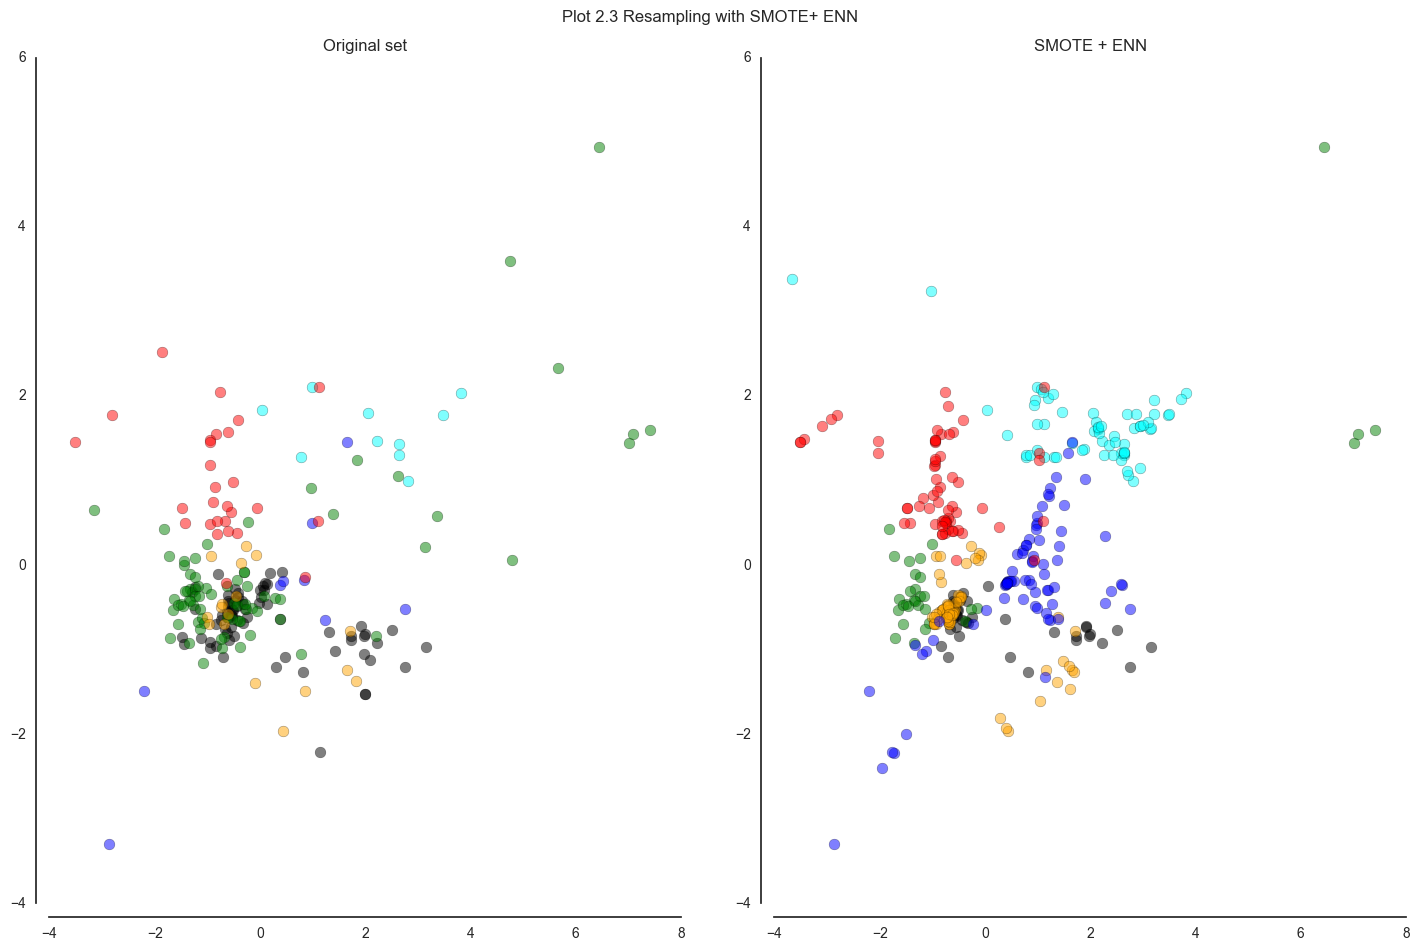

In [17]:
# Instanciate a Scaler object
r_scaler=RobustScaler(quantile_range=(25, 75))

# Apply fit_transform on original dataset
X_scaled = r_scaler.fit_transform(X)

# Instanciate a PCA object to facilitate two dimentional visualisation
pca = PCA(n_components=2)

# Fit and transform X
X_vis = pca.fit_transform(X_scaled)

# Apply SMOTE + ENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(X_scaled, y)
X_res_vis = pca.transform(X_resampled)

print ('Original data, samples: ',len(y))
print ('Resampled data, samples: ',len(y_resampled))

table1=pd.DataFrame(data=np.bincount(y.astype('int')),columns=['Original'])
table2=pd.DataFrame(data=np.bincount(y_resampled.astype('int')),columns=['SMOTEENN'])
table=pd.concat([table1,table2],axis=1)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,10))
ax1.set_title('Original set')
ax2.set_title('SMOTE + ENN')
f.suptitle("Plot 2.3 Resampling with SMOTE+ ENN")

colours=['yellow','black','green','orange','red','cyan','blue','red']

nclasses=list(np.unique(y).astype('int'))
for i in nclasses:
    ax1.scatter(X_vis[y == i, 0], X_vis[y == i, 1],alpha=0.5,c=colours[i],s=60)
    ax2.scatter(X_res_vis[y_resampled == i, 0], X_res_vis[y_resampled == i, 1],alpha=0.5,c=colours[i],s=60)


for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-4, 8])
    ax.set_ylim([-4, 6])

result=pd.concat([table,pd.DataFrame(colours,columns=['Colour'])],axis=1)
print('\nClass distribution in original and resampled dataset:\n')
print(result[(result[['Original','SMOTEENN']].T != 0).any()])

plt.tight_layout(pad=3)
plt.show()

New samples are created by interpolation. 

#### 2.4. Hyperparameters optimisation with GridSearchCV

Let's find best paramenters for different learning algorithms on the Glass dataset.

In [18]:
# Set seed and split dataset on train and test subset
seed=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)

# Instanciate a Scaler object
r_scaler=RobustScaler(quantile_range=(25, 75))

# Apply fit_transform on original dataset
X_train_scaled = r_scaler.fit_transform(X_train)
X_test_scaled = r_scaler.transform(X_test)

# Apply SMOTE + ENN
sm = SMOTEENN(random_state=seed)
X_resampled, y_resampled = sm.fit_sample(X_train_scaled, y_train)

In [19]:
# Find best hyperparameters for SVM

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1, 1e-2, 1e-3, 1e-4],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

kf=StratifiedKFold(n_splits=10,random_state=seed)
cl=SVC(random_state=seed)

print("Tuning hyper-parameters for SVM\n")
grid = GridSearchCV(estimator=cl,param_grid=tuned_parameters, cv=kf,scoring='f1_weighted')
grid.fit(X_resampled, y_resampled)

print("Best parameters set:\n")
print(grid.best_params_,grid.best_score_,grid.score(X_test_scaled,y_test))
print("\nGrid scores on development set:")

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

print("\n The scores are computed with the best parameters set.\n")
y_test, y_pred = y_test, grid.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


Tuning hyper-parameters for SVM

Best parameters set:

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} 0.991529755385177 0.6813330460389282

Grid scores on development set:
0.899 (+/-0.106) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.752 (+/-0.058) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.148 (+/-0.146) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.080 (+/-0.014) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.992 (+/-0.033) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.914 (+/-0.083) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.760 (+/-0.047) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.144 (+/-0.138) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.992 (+/-0.033) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.982 (+/-0.058) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.919 (+/-0.078) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.758 (+/-0.052) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.992 (+/-0.033) for {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.982 (+

In [20]:
# Find best hyperparameters for RandomForest

tuned_parameters = [{'max_features': ['auto','sqrt','log2'],'n_estimators': [10,50,100], 'max_depth': [5,10]}]

kf=StratifiedKFold(n_splits=10,random_state=seed)
cl=RandomForestClassifier(random_state=seed)

print("Tuning hyper-parameters for RandomForest\n")
grid = GridSearchCV(estimator=cl,param_grid=tuned_parameters, cv=kf,scoring='f1_weighted')
grid.fit(X_resampled, y_resampled)

print("Best parameters set:\n")
print(grid.best_params_,grid.best_score_,grid.score(X_test_scaled,y_test))
print("\nGrid scores on development set:")

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

print("\n The scores are computed with the best parameters set.\n")
y_test, y_pred = y_test, grid.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


Tuning hyper-parameters for RandomForest

Best parameters set:

{'n_estimators': 50, 'max_features': 'auto', 'max_depth': 10} 0.9831206722772987 0.6964527980817572

Grid scores on development set:
0.962 (+/-0.070) for {'n_estimators': 10, 'max_features': 'auto', 'max_depth': 5}
0.954 (+/-0.100) for {'n_estimators': 50, 'max_features': 'auto', 'max_depth': 5}
0.959 (+/-0.079) for {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 5}
0.962 (+/-0.070) for {'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 5}
0.954 (+/-0.100) for {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 5}
0.959 (+/-0.079) for {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 5}
0.962 (+/-0.070) for {'n_estimators': 10, 'max_features': 'log2', 'max_depth': 5}
0.954 (+/-0.100) for {'n_estimators': 50, 'max_features': 'log2', 'max_depth': 5}
0.959 (+/-0.079) for {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 5}
0.979 (+/-0.054) for {'n_estimators': 10, 'max_features': 'aut

In [21]:
# Find best hyperparameters for ExtraTreesClassifier

tuned_parameters = [{'max_features': ['auto','sqrt','log2'],'n_estimators': [10,50,100], 'max_depth': [5,10]}]

kf=StratifiedKFold(n_splits=10,random_state=seed)
cl=ExtraTreesClassifier(random_state=seed)

print("Tuning hyper-parameters for ExtraTreesClassifier\n")
grid = GridSearchCV(estimator=cl,param_grid=tuned_parameters, cv=kf,scoring='f1_weighted')
grid.fit(X_resampled, y_resampled)

print("Best parameters set:\n")
print(grid.best_params_,grid.best_score_,grid.score(X_test_scaled,y_test))
print("\nGrid scores on development set:")

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

print("\n The scores are computed with the best parameters set.\n")
y_test, y_pred = y_test, grid.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

Tuning hyper-parameters for ExtraTreesClassifier

Best parameters set:

{'n_estimators': 10, 'max_features': 'auto', 'max_depth': 10} 0.9960476827946707 0.7114383495188448

Grid scores on development set:
0.863 (+/-0.117) for {'n_estimators': 10, 'max_features': 'auto', 'max_depth': 5}
0.875 (+/-0.122) for {'n_estimators': 50, 'max_features': 'auto', 'max_depth': 5}
0.888 (+/-0.113) for {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 5}
0.863 (+/-0.117) for {'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 5}
0.875 (+/-0.122) for {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 5}
0.888 (+/-0.113) for {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 5}
0.863 (+/-0.117) for {'n_estimators': 10, 'max_features': 'log2', 'max_depth': 5}
0.875 (+/-0.122) for {'n_estimators': 50, 'max_features': 'log2', 'max_depth': 5}
0.888 (+/-0.113) for {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 5}
0.996 (+/-0.023) for {'n_estimators': 10, 'max_feature

In [22]:
# Find best hyperparameters for AdaBoostClassifier

tuned_parameters = [{'learning_rate': [1,2,3,4,5,10],'n_estimators': [10,50,100]}]

kf=StratifiedKFold(n_splits=10,random_state=seed)
cl=AdaBoostClassifier(random_state=seed)

print("Tuning hyper-parameters for AdaBoostClassifier\n")
grid = GridSearchCV(estimator=cl,param_grid=tuned_parameters, cv=kf,scoring='f1_weighted')
grid.fit(X_resampled, y_resampled)

print("Best parameters set:\n")
print(grid.best_params_,grid.best_score_,grid.score(X_test_scaled,y_test))
print("\nGrid scores on development set:")

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

print("\n The scores are computed with the best parameters set.\n")
y_test, y_pred = y_test, grid.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

Tuning hyper-parameters for AdaBoostClassifier

Best parameters set:

{'learning_rate': 3, 'n_estimators': 100} 0.9104875490417659 0.5586767219708396

Grid scores on development set:
0.480 (+/-0.096) for {'learning_rate': 1, 'n_estimators': 10}
0.480 (+/-0.096) for {'learning_rate': 1, 'n_estimators': 50}
0.480 (+/-0.096) for {'learning_rate': 1, 'n_estimators': 100}
0.756 (+/-0.145) for {'learning_rate': 2, 'n_estimators': 10}
0.822 (+/-0.254) for {'learning_rate': 2, 'n_estimators': 50}
0.825 (+/-0.294) for {'learning_rate': 2, 'n_estimators': 100}
0.575 (+/-0.432) for {'learning_rate': 3, 'n_estimators': 10}
0.907 (+/-0.107) for {'learning_rate': 3, 'n_estimators': 50}
0.910 (+/-0.124) for {'learning_rate': 3, 'n_estimators': 100}
0.414 (+/-0.240) for {'learning_rate': 4, 'n_estimators': 10}
0.862 (+/-0.179) for {'learning_rate': 4, 'n_estimators': 50}
0.883 (+/-0.118) for {'learning_rate': 4, 'n_estimators': 100}
0.243 (+/-0.369) for {'learning_rate': 5, 'n_estimators': 10}
0.569 (

F1 weighted-score:

KNN 0.6967459925611402
SVM 0.7282828282828282
RF 0.8078835694220309
ET 0.7850712250712251
ADA 0.6000246812011518


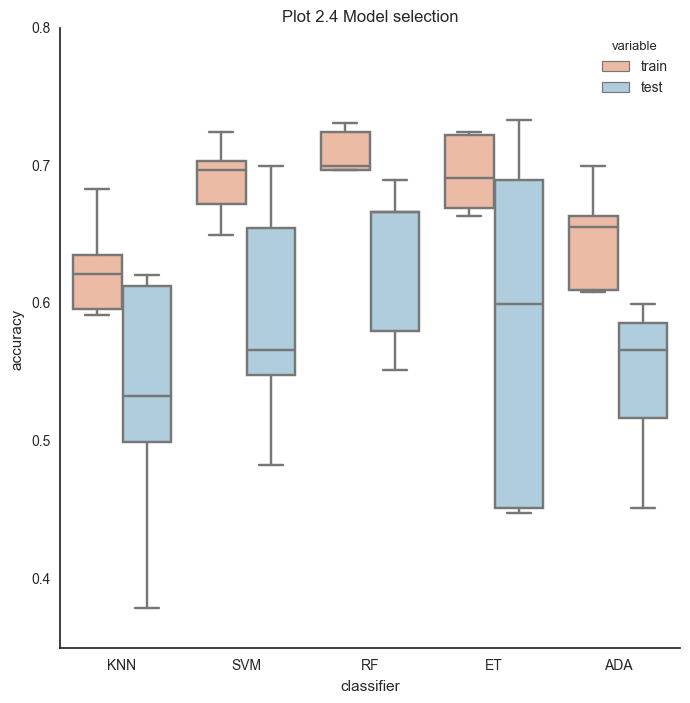

In [23]:
# Model selection

seed=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)

sc=RobustScaler(quantile_range=(25, 75))

sm = SMOTEENN(random_state=seed)

kf=StratifiedKFold(n_splits=5,random_state=seed)

classifiers= [
    KNeighborsClassifier(n_neighbors=6,algorithm='auto'),
    SVC(C=10, gamma=0.1, kernel='rbf',random_state=seed),
    RandomForestClassifier(max_features= 'auto', max_depth= 10, n_estimators= 100, random_state=seed),
    ExtraTreesClassifier(max_features= 'auto', max_depth= 10, n_estimators= 10, random_state=seed),
    AdaBoostClassifier(learning_rate=3, n_estimators=100, random_state=seed)
    ]

cl_df=pd.DataFrame() 
results=[]
names=['KNN','SVM','RF','ET','ADA']

print('F1 weighted-score:\n')
for name,model in zip(names,classifiers):
    pipe=make_pipeline(sc,sm,model)
    scores=cross_validate(pipe, X_train, y_train,cv=kf,scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mean_f1 = f1_score(y_test, y_pred, average='weighted')
    print(name,mean_f1)
    model_df=pd.DataFrame(data=[scores['train_score'],scores['test_score']],index=['train','test']).T
    model_df['name']=name
    cl_df=pd.concat([cl_df,model_df])
   
cl_df_melt=pd.melt(cl_df,id_vars=['name'],value_vars=['train','test'])

f, ax = plt.subplots(figsize=(8, 8))
plt.ylim(0.35,.8)
sns.boxplot(x="name", y="value", hue="variable",data=cl_df_melt,palette='RdBu',showfliers=False)
ax.set_title("Plot 2.4 Model selection")
ax.set(xlabel='classifier', ylabel='accuracy')

sns.despine()

In [24]:
print('RandomForest classification report:\n')
print(classification_report(y_test, y_hat))

print('\nConfusion matrix: \n',confusion_matrix(y_test, y_hat))

RandomForest classification report:

             precision    recall  f1-score   support

        1.0       0.81      0.88      0.85        25
        2.0       0.83      0.90      0.86        21
        3.0       0.50      0.14      0.22         7
        5.0       1.00      1.00      1.00         2
        6.0       0.50      1.00      0.67         1
        7.0       1.00      1.00      1.00         9

avg / total       0.81      0.83      0.81        65


Confusion matrix: 
 [[22  2  1  0  0  0]
 [ 1 19  0  0  1  0]
 [ 4  2  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  9]]
